In [1]:
import pandas as pd
import numpy as np
from __future__ import division

#Imports to support question requirements
from sklearn import linear_model

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.grid_search import GridSearchCV

from sklearn import cross_validation
from sklearn.cross_validation import train_test_split

from sklearn import metrics
from sklearn.metrics import mean_squared_error

from sklearn import grid_search
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap

In [2]:
import platform
platform.architecture()

('64bit', 'WindowsPE')

In [3]:
#Read in Raw Data
#Raw Data obtained from OpenFDA utilizing 
#USER: jonathan.jenkins@cobbcounty.org 
#openfda_key: I9xyrcKyaksgGXbPndjCAoCFQrQsMywCvwyIfDMS 
recalls_raw = pd.read_csv('FDA_Drug_Enforcement_Report.csv')

In [4]:
recalls_raw.head()

Product Type  Event ID   Status          Recalling Firm             City  \
0        Drugs     71973  Ongoing  Ohm Laboratories, Inc.  North Brunswick   
1        Drugs     71973  Ongoing  Ohm Laboratories, Inc.  North Brunswick   
2        Drugs     71973  Ongoing  Ohm Laboratories, Inc.  North Brunswick   
3        Drugs     71973  Ongoing  Ohm Laboratories, Inc.  North Brunswick   
4        Drugs     71973  Ongoing  Ohm Laboratories, Inc.  North Brunswick   

  State Country         Voluntary/Mandated  \
0    NJ      US  Voluntary: Firm Initiated   
1    NJ      US  Voluntary: Firm Initiated   
2    NJ      US  Voluntary: Firm Initiated   
3    NJ      US  Voluntary: Firm Initiated   
4    NJ      US  Voluntary: Firm Initiated   

  Initial Firm Notification of Consignee or Public Distribution Pattern  \
0                                           Letter          Nationwide.   
1                                           Letter          Nationwide.   
2                                           Letter          Nationwide.   
3                                           Letter          Nationwide.   
4                                           Letter          Nationwide.   

  Recall Number Classification  \
0   D-0019-2016      Class III   
1   D-0020-2016      Class III   
2   D-0021-2016      Class III   
3   D-0022-2016      Class III   
4   D-0023-2016      Class III   

                                 Product Description  \
0  QC Quality Choice Loratadine Orally Disintegra...   
1  Rite Aid Pharmacy loratadine orally disintegra...   
2  Health Best Choice Care, Loratadine Orally Dis...   
3  CareOne Original Prescription Strength, Allerg...   
4  CVS Pharmacy, Original Prescription Strength, ...   

                                           Code Info  Code Info (Continued)  \
0  Batch Numbers:  2644273, Exp 9/30/2016; 260012...                    NaN   
1  Batch Numbers:   a) 2658137, Exp 11/30/2016; 2...                    NaN   
2  Batch Numbers:  2625092, Exp 6/30/2016; 264426...                    NaN   
3  Batch Numbers: (a) 2617891, Exp 5/31/2016; 260...                    NaN   
4  Batch Numbers:    a) 2644273, 2644265, Exp 9/3...                    NaN   

   Product Quantity                                  Reason for Recall  \
0       8,735 boxes  Superpotent Drug: Out Of Specification (OOS) r...   
1      90,410 boxes  Superpotent Drug: Out Of Specification (OOS) r...   
2       18576 boxes  Superpotent Drug: Out Of Specification (OOS) r...   
3      21,356 boxes  Superpotent Drug: Out Of Specification (OOS) r...   
4     291,312 boxes  Superpotent Drug: Out Of Specification (OOS) r...   

  Recall Initiation Date Report Date  
0              7/28/2015  10/21/2015  
1              7/28/2015  10/21/2015  
2              7/28/2015  10/21/2015  
3              7/28/2015  10/21/2015  
4              7/28/2015  10/21/2015

In [5]:
recalls_raw.columns.values

array(['Product Type', 'Event ID', 'Status', 'Recalling Firm', 'City',
       'State', 'Country', 'Voluntary/Mandated',
       'Initial Firm Notification of Consignee or Public',
       'Distribution Pattern', 'Recall Number', 'Classification',
       'Product Description', 'Code Info', 'Code Info (Continued)',
       ' Product Quantity', 'Reason for Recall', 'Recall Initiation Date',
       'Report Date'], dtype=object)

In [6]:
recalls_raw.columns.value_counts()

Event ID                                            1
Code Info (Continued)                               1
City                                                1
Voluntary/Mandated                                  1
Code Info                                           1
Classification                                      1
Product Description                                 1
Country                                             1
Recall Initiation Date                              1
Initial Firm Notification of Consignee or Public    1
Reason for Recall                                   1
 Product Quantity                                   1
State                                               1
Report Date                                         1
Recall Number                                       1
Distribution Pattern                                1
Recalling Firm                                      1
Product Type                                        1
Status                      

In [7]:
#Raw Feature Columns
#X_cols = ['Report Date', 'Voluntary/Mandated', 'Distribution Pattern', 'Code Info', ' Product Quantity']
X_cols = ['Report Date', 'Country', 'Voluntary/Mandated', 'Recall Number', 'Reason for Recall', 'Recall Initiation Date', 'Distribution Pattern', 'Product Description', 'Code Info', ' Product Quantity']
X_raw = recalls_raw[X_cols]

#Response Variable
y_raw = recalls_raw['Classification']

In [8]:
X_raw.head()

Report Date Country         Voluntary/Mandated Recall Number  \
0  10/21/2015      US  Voluntary: Firm Initiated   D-0019-2016   
1  10/21/2015      US  Voluntary: Firm Initiated   D-0020-2016   
2  10/21/2015      US  Voluntary: Firm Initiated   D-0021-2016   
3  10/21/2015      US  Voluntary: Firm Initiated   D-0022-2016   
4  10/21/2015      US  Voluntary: Firm Initiated   D-0023-2016   

                                   Reason for Recall Recall Initiation Date  \
0  Superpotent Drug: Out Of Specification (OOS) r...              7/28/2015   
1  Superpotent Drug: Out Of Specification (OOS) r...              7/28/2015   
2  Superpotent Drug: Out Of Specification (OOS) r...              7/28/2015   
3  Superpotent Drug: Out Of Specification (OOS) r...              7/28/2015   
4  Superpotent Drug: Out Of Specification (OOS) r...              7/28/2015   

  Distribution Pattern                                Product Description  \
0          Nationwide.  QC Quality Choice Loratadine Orally Disintegra...   
1          Nationwide.  Rite Aid Pharmacy loratadine orally disintegra...   
2          Nationwide.  Health Best Choice Care, Loratadine Orally Dis...   
3          Nationwide.  CareOne Original Prescription Strength, Allerg...   
4          Nationwide.  CVS Pharmacy, Original Prescription Strength, ...   

                                           Code Info  Product Quantity  
0  Batch Numbers:  2644273, Exp 9/30/2016; 260012...       8,735 boxes  
1  Batch Numbers:   a) 2658137, Exp 11/30/2016; 2...      90,410 boxes  
2  Batch Numbers:  2625092, Exp 6/30/2016; 264426...       18576 boxes  
3  Batch Numbers: (a) 2617891, Exp 5/31/2016; 260...      21,356 boxes  
4  Batch Numbers:    a) 2644273, 2644265, Exp 9/3...     291,312 boxes

In [9]:
y_raw.head()

0    Class III
1    Class III
2    Class III
3    Class III
4    Class III
Name: Classification, dtype: object

# Feature Engineering

In [10]:
#X['Country'].unique
print np.unique(X_raw[['Country']])

[nan 'AE' 'CA' 'CH' 'GY' 'IN' 'US']


In [11]:
print 'Country', "has", len(np.unique(X_raw[['Country']])), "unique values"

Country has 7 unique values


In [12]:
print np.unique(X_raw[['Voluntary/Mandated']])

[nan 'Voluntary: Firm Initiated']


C:\Anaconda\lib\site-packages\numpy\lib\arraysetops.py:200: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))


In [13]:
print 'Voluntary/Mandated', "has", len(np.unique(X_raw[['Voluntary/Mandated']]),), "unique values"

Voluntary/Mandated has 2 unique values


In [14]:
print np.unique(X_raw[['Distribution Pattern']])

['AK, NC, GA' 'AZ' 'AZ and KS' 'AZ, CT, MO, MS, PA, FL, WA, NC, CA, TX, OK'
 'All lots were distributed throughout the US.' 'Amazon US and Amazon UK'
 "Approximately 30% of all finished products were sold to customers in interstate to include but may not be limited to NY, NJ & CT via UPS.  Products are promoted and sold directly to customers at Healthy Life Chemistry's retail store at 13A Lucon Drive in Deer Park, NY, on the company website (www.purityfirst.com), and are available at the health food store, Total Health, located at 120 Rte 110, Farmingdale, NY (www.totaldiscountvitamins.com)."
 'Atlanta, Georgia' 'CA' 'CA & VA' 'CA OH, PA, RI,& TX' 'CA and NV'
 'CA, FL and UT' 'CA, GA, NC, and MO' 'CA, IN' 'CO & OH'
 'CO, GA, MI, and Puerto Rico' 'CT' 'CT, FL, MD, MS, NY' 'California'
 'California and Colorado.' 'Canada' 'Costa Rica'
 'Dialysis Centers  Direct to patient'
 'Directly to patients and physicians in FL, NJ, NY, and Puerto Rico'
 'Distributed in Georgia and Missouri.'
 'Dist

In [15]:
print 'Distribution Pattern', "has", len(np.unique(X_raw[['Distribution Pattern']])), "unique values"

Distribution Pattern has 313 unique values


In [16]:
print np.unique(X_raw[['Report Date']])

['1/1/2014' '1/14/2015' '1/15/2014' '1/2/2013' '1/21/2015' '1/22/2014'
 '1/23/2013' '1/28/2015' '1/29/2014' '1/30/2013' '1/7/2015' '1/8/2014'
 '1/9/2013' '10/10/2012' '10/14/2015' '10/15/2014' '10/16/2013'
 '10/17/2012' '10/2/2013' '10/21/2015' '10/22/2014' '10/23/2013'
 '10/24/2012' '10/29/2014' '10/3/2012' '10/30/2013' '10/31/2012'
 '10/7/2014' '10/7/2015' '10/9/2013' '11/12/2014' '11/13/2013' '11/14/2012'
 '11/19/2014' '11/21/2012' '11/26/2014' '11/27/2013' '11/28/2012'
 '11/5/2014' '11/6/2013' '11/7/2012' '12/10/2014' '12/11/2013' '12/12/2012'
 '12/17/2014' '12/18/2013' '12/19/2012' '12/2/2014' '12/24/2014'
 '12/26/2012' '12/26/2013' '12/31/2014' '12/4/2013' '12/5/2012' '2/11/2015'
 '2/12/2014' '2/13/2013' '2/18/2015' '2/20/2013' '2/25/2015' '2/27/2013'
 '2/4/2015' '2/5/2014' '2/6/2013' '3/11/2015' '3/12/2014' '3/13/2013'
 '3/18/2015' '3/19/2014' '3/20/2013' '3/25/2015' '3/26/2014' '3/27/2013'
 '3/4/2015' '3/5/2014' '3/6/2013' '4/1/2015' '4/10/2013' '4/15/2015'
 '4/16/2014' '4/17/2

In [17]:
print 'Report Date', "has", len(np.unique(X_raw[['Report Date']])), "unique values"

Report Date has 168 unique values


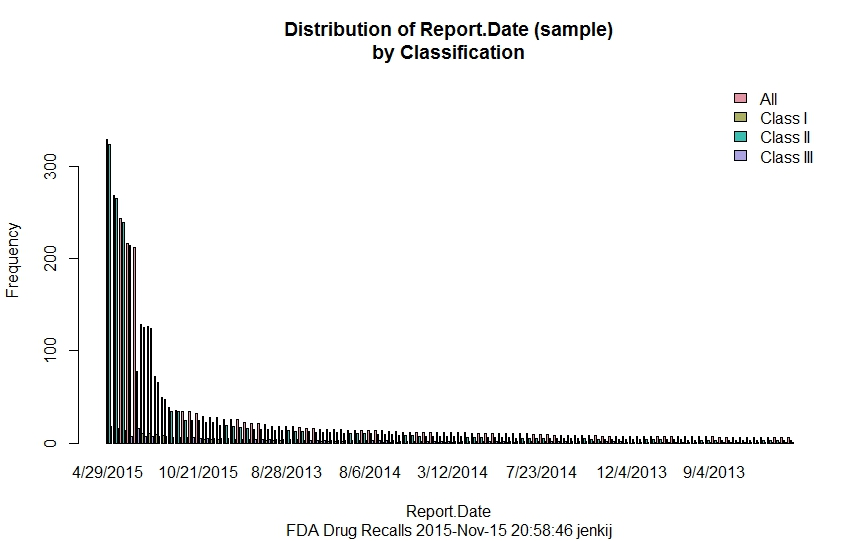

In [18]:
from IPython.display import Image
Image(filename='Distribution_of_ReportDate.jpeg') 

In [19]:
print np.unique(X_raw[['Reason for Recall']])

[ '  Failed Impurities/Degradation Specifications: Teva Pharmaceuticals USA, Inc. is voluntarily recalling one lot of  Velivet distributed by Barr Laboratories, Inc.  due to out of specification impurity test results.  '
 ' CGMP Deviations: The pressure gages, vacuum gages, and thermometer had surpassed the calibration expiry period, which may have resulted in overfill/underfill of oxygen cylinders.'
 " Labeling: Label Mix-up: Pitocin storage conditions should be labeled, ''Store between 20 to 25C (68 to 77F)''. Pitocin lot 225867 and part of Pitocin lot 231423 were labeled, ''Store between 20 to 25C (28 to 77F)''. "
 ...,
 'cGMP Deviations; during the production process, CLENZIderm M.D. Daily Foam Cleanser was filled into some bottles labeled as CLENZIderm M.D. Pore Therapy'
 'cGMP Deviations; products being recalled in response to a recall notice from the manufacturer, Wockhardt Limited, following a FDA inspection which noted inadequate investigation of market complaints, resulting i

In [20]:
print 'Reason for Recall', 'has', len(np.unique(X_raw[['Reason for Recall']])), "unique values"

Reason for Recall has 1403 unique values


In [21]:
print np.unique(X_raw[['Product Description']])

[ '    LIDOCAINE/EPINEPHRINE/BUPIVACAINE, PF 1%/0.00025%/0.375% OPHTHALMIC   30 ML          48 ML     60 ML     90 ML;  LIDOCAINE/EPINEPHRINE/BUPIVACAINE, PF 1%/0.0005%/0.25% OPHTHALMIC   30 ML          48 ML     60 ML          90 ML  (8 DIFFERENT PRODUCTS)'
 '   MANNITOL 20% INJECTABLE   1250 ML         250 ML          2500 ML          400 ML;       MANNITOL 25% INJECTABLE   1200 ML          300 ML                    350 ML     400 ML     600 ML  (9 DIFFERENT PRODUCTS)'
 ' 0.9% Sodium Chloride Injection USP, 100 mL   Hospira, Inc., Lake Forest, IL 60045 NDC 0409-7984-23,'
 ...,
 'univasc (moexipril HCl) tablets, 7.5 mg, 100 Ct Bottle, Rx Only. Manufactured for UCB, Inc., Smyrna, GA 30080. NDC: 0091-3707-01.'
 'vitaliKOR Ready When You Are, Fast Acting Formula Dietary Supplement capsules, 40 count bottle, Distributed by Vitality Research Labs, LLC, Las Vegas, NV 89148.   '
 'yum yum bubble gum Justice, BUBBLEGUM SCENT ANTI BAC, Ethyl Alcohol, Net Wt. 1 fl oz, Distr by Tween Brands New 

In [22]:
print 'Product Description', 'has', len(np.unique(X_raw[['Product Description']])), "unique values"

Product Description has 4348 unique values


In [23]:
list(X_raw['Reason for Recall'].unique())

['Superpotent Drug: Out Of Specification (OOS) result for Assay. ',
 'Lack of Assurance of Sterility; potential exposure to non-sterile lubricant during the filling process',
 'Subpotent Drug: Stability samples were confirmed to be out of specification for potency at the 12 month time point.',
 'Lack of assurance of sterility',
 'CGMP Deviations: The active pharmaceutical ingredient (API) intended for use in furosemide oral solution USP was inadvertently used to manufacture the recalled furosemide tablets USP. ',
 'Cross Contamination With Other Products: Potential cross-contamination of cephalosporin.',
 "Labeling: Incorrect Instructions; The word not is missing from the following sentences ''do bandage tightly or cover with any type of wrap except clothing and ''do use with a heating pad or with other heat sources in the Drug Facts panel ''Warning'' section",
 'Failed Dissolution Specifications: Low Out-of-Specification results for the 8 hour timepoint.',
 'Lack of Assurance of Steri

In [24]:
np.unique(X_raw[['Voluntary/Mandated']])

array([nan, 'Voluntary: Firm Initiated'], dtype=object)

In [25]:
np.unique(y_raw)

array(['Class I', 'Class II', 'Class III'], dtype=object)

In [26]:
raw_obs = len(recalls_raw)
print raw_obs

4429


In [27]:
print "There are %r observations in the raw data set" % raw_obs

There are 4429 observations in the raw data set


# Removing Observations with Missing Data

In [28]:
from numpy import nan as NA

In [29]:
recalls_clean = recalls_raw.dropna(subset=['Report Date', 'Country', 'Voluntary/Mandated', 'Recall Number', 'Reason for Recall', 'Recall Initiation Date', 'Distribution Pattern', 'Product Description', 'Code Info', ' Product Quantity'])

In [30]:
recalls_clean.head()

Product Type  Event ID   Status          Recalling Firm             City  \
0        Drugs     71973  Ongoing  Ohm Laboratories, Inc.  North Brunswick   
1        Drugs     71973  Ongoing  Ohm Laboratories, Inc.  North Brunswick   
2        Drugs     71973  Ongoing  Ohm Laboratories, Inc.  North Brunswick   
3        Drugs     71973  Ongoing  Ohm Laboratories, Inc.  North Brunswick   
4        Drugs     71973  Ongoing  Ohm Laboratories, Inc.  North Brunswick   

  State Country         Voluntary/Mandated  \
0    NJ      US  Voluntary: Firm Initiated   
1    NJ      US  Voluntary: Firm Initiated   
2    NJ      US  Voluntary: Firm Initiated   
3    NJ      US  Voluntary: Firm Initiated   
4    NJ      US  Voluntary: Firm Initiated   

  Initial Firm Notification of Consignee or Public Distribution Pattern  \
0                                           Letter          Nationwide.   
1                                           Letter          Nationwide.   
2                                           Letter          Nationwide.   
3                                           Letter          Nationwide.   
4                                           Letter          Nationwide.   

  Recall Number Classification  \
0   D-0019-2016      Class III   
1   D-0020-2016      Class III   
2   D-0021-2016      Class III   
3   D-0022-2016      Class III   
4   D-0023-2016      Class III   

                                 Product Description  \
0  QC Quality Choice Loratadine Orally Disintegra...   
1  Rite Aid Pharmacy loratadine orally disintegra...   
2  Health Best Choice Care, Loratadine Orally Dis...   
3  CareOne Original Prescription Strength, Allerg...   
4  CVS Pharmacy, Original Prescription Strength, ...   

                                           Code Info  Code Info (Continued)  \
0  Batch Numbers:  2644273, Exp 9/30/2016; 260012...                    NaN   
1  Batch Numbers:   a) 2658137, Exp 11/30/2016; 2...                    NaN   
2  Batch Numbers:  2625092, Exp 6/30/2016; 264426...                    NaN   
3  Batch Numbers: (a) 2617891, Exp 5/31/2016; 260...                    NaN   
4  Batch Numbers:    a) 2644273, 2644265, Exp 9/3...                    NaN   

   Product Quantity                                  Reason for Recall  \
0       8,735 boxes  Superpotent Drug: Out Of Specification (OOS) r...   
1      90,410 boxes  Superpotent Drug: Out Of Specification (OOS) r...   
2       18576 boxes  Superpotent Drug: Out Of Specification (OOS) r...   
3      21,356 boxes  Superpotent Drug: Out Of Specification (OOS) r...   
4     291,312 boxes  Superpotent Drug: Out Of Specification (OOS) r...   

  Recall Initiation Date Report Date  
0              7/28/2015  10/21/2015  
1              7/28/2015  10/21/2015  
2              7/28/2015  10/21/2015  
3              7/28/2015  10/21/2015  
4              7/28/2015  10/21/2015

In [31]:
clean_obs = len(recalls_clean)
print clean_obs

4045


In [32]:
print "There are %r observations in the cleaned data set" % clean_obs

There are 4045 observations in the cleaned data set


In [33]:
removed_obs = raw_obs-clean_obs
print "%r observations were removed in the cleaning process" % (removed_obs)

384 observations were removed in the cleaning process


In [34]:
#Feature Columns of Clean Data
#X_cols = ['Report Date', 'Country', 'Voluntary/Mandated', 'Recall Number', 'Reason for Recall', 'Recall Initiation Date', 'Distribution Pattern', 'Product Description', 'Code Info', ' Product Quantity']
#X_cols = ['Report Date', 'Country', 'Voluntary/Mandated', 'Reason for Recall', 'Distribution Pattern', 'Product Description']
#X = recalls_clean[X_cols]

# Feature columns for Machine Learning
X_cols_for_ml = ['Report Date', 'Country', 'Voluntary/Mandated', 'Distribution Pattern']
X_ml = recalls_clean[X_cols_for_ml]

# Feature columns for Text Mining
X_cols_for_tm = ['Reason for Recall', 'Distribution Pattern', 'Product Description', 'Code Info']
X_tm = recalls_clean[X_cols_for_tm]

#Response Variable
y = recalls_clean['Classification']

In [35]:
X_ml.head()

Report Date Country         Voluntary/Mandated Distribution Pattern
0  10/21/2015      US  Voluntary: Firm Initiated          Nationwide.
1  10/21/2015      US  Voluntary: Firm Initiated          Nationwide.
2  10/21/2015      US  Voluntary: Firm Initiated          Nationwide.
3  10/21/2015      US  Voluntary: Firm Initiated          Nationwide.
4  10/21/2015      US  Voluntary: Firm Initiated          Nationwide.

In [36]:
X_tm.head()

Reason for Recall Distribution Pattern  \
0  Superpotent Drug: Out Of Specification (OOS) r...          Nationwide.   
1  Superpotent Drug: Out Of Specification (OOS) r...          Nationwide.   
2  Superpotent Drug: Out Of Specification (OOS) r...          Nationwide.   
3  Superpotent Drug: Out Of Specification (OOS) r...          Nationwide.   
4  Superpotent Drug: Out Of Specification (OOS) r...          Nationwide.   

                                 Product Description  \
0  QC Quality Choice Loratadine Orally Disintegra...   
1  Rite Aid Pharmacy loratadine orally disintegra...   
2  Health Best Choice Care, Loratadine Orally Dis...   
3  CareOne Original Prescription Strength, Allerg...   
4  CVS Pharmacy, Original Prescription Strength, ...   

                                           Code Info  
0  Batch Numbers:  2644273, Exp 9/30/2016; 260012...  
1  Batch Numbers:   a) 2658137, Exp 11/30/2016; 2...  
2  Batch Numbers:  2625092, Exp 6/30/2016; 264426...  
3  Batch Numbers: (a) 2617891, Exp 5/31/2016; 260...  
4  Batch Numbers:    a) 2644273, 2644265, Exp 9/3...

# Feature Columns with Dummies for Country, Voluntary/Mandated and Distribution Pattern

In [37]:
X_no_dummies_cols = ['Report Date', 'Reason for Recall', 'Distribution Pattern', 'Product Description']
X_text = recalls_clean[X_no_dummies_cols]

#Response Variable
y = recalls_clean['Classification']

In [38]:
X_text.head()

Report Date                                  Reason for Recall  \
0  10/21/2015  Superpotent Drug: Out Of Specification (OOS) r...   
1  10/21/2015  Superpotent Drug: Out Of Specification (OOS) r...   
2  10/21/2015  Superpotent Drug: Out Of Specification (OOS) r...   
3  10/21/2015  Superpotent Drug: Out Of Specification (OOS) r...   
4  10/21/2015  Superpotent Drug: Out Of Specification (OOS) r...   

  Distribution Pattern                                Product Description  
0          Nationwide.  QC Quality Choice Loratadine Orally Disintegra...  
1          Nationwide.  Rite Aid Pharmacy loratadine orally disintegra...  
2          Nationwide.  Health Best Choice Care, Loratadine Orally Dis...  
3          Nationwide.  CareOne Original Prescription Strength, Allerg...  
4          Nationwide.  CVS Pharmacy, Original Prescription Strength, ...

In [39]:
X_dummy1 = pd.get_dummies(recalls_clean['Country'], prefix='Country ')
X_dummy2 = pd.get_dummies(recalls_clean['Voluntary/Mandated'], prefix='Voluntary/Mandated ')
X_dummy3 = pd.get_dummies(recalls_clean['Distribution Pattern'], prefix='Distribution Pattern')

In [40]:
X_dummy1.head()

Country _AE  Country _CA  Country _CH  Country _GY  Country _IN  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Country _US  
0            1  
1            1  
2            1  
3            1  
4            1

In [41]:
X_dummy2.head()

Voluntary/Mandated _Voluntary: Firm Initiated
0                                              1
1                                              1
2                                              1
3                                              1
4                                              1

In [42]:
X_dummy3.head()

Distribution Pattern_AK, NC, GA  Distribution Pattern_AZ  \
0                                0                        0   
1                                0                        0   
2                                0                        0   
3                                0                        0   
4                                0                        0   

   Distribution Pattern_AZ and KS  \
0                               0   
1                               0   
2                               0   
3                               0   
4                               0   

   Distribution Pattern_AZ, CT, MO, MS, PA, FL, WA, NC, CA, TX, OK  \
0                                                  0                 
1                                                  0                 
2                                                  0                 
3                                                  0                 
4                                                  0                 

   Distribution Pattern_All lots were distributed throughout the US.  \
0                                                  0                   
1                                                  0                   
2                                                  0                   
3                                                  0                   
4                                                  0                   

   Distribution Pattern_Amazon US and Amazon UK  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Distribution Pattern_Approximately 30% of all finished products were sold to customers in interstate to include but may not be limited to NY, NJ & CT via UPS.  Products are promoted and sold directly to customers at Healthy Life Chemistry's retail store at 13A Lucon Drive in Deer Park, NY, on the company website (www.purityfirst.com), and are available at the health food store, Total Health, located at 120 Rte 110, Farmingdale, NY (www.totaldiscountvitamins.com).  \
0                                                  0                                                                                                                                                                                                                                                                                                                                                                                                                                     
1                                                  0                                                                                                                                                                                                                                                                                                                                                                                                                                     
2                                                  0                                                                                                                                                                                                                                                                                                                                                                                                                                     
3                                                  0                                                                                                                                                                                                                                                                                                    

In [43]:
# Joining dummy variables
#X2 = pd.concat([X_dummy1, X_dummy2, X_dummy3], axis=1, join='inner')
#X = pd.concat([X_clean, X_dummy1, X_dummy2], axis=1, join='inner')
X_ml = pd.concat([recalls_clean['Report Date'], X_dummy1, X_dummy2, X_dummy3], axis=1, join='inner')

In [44]:
X_ml.head()

Report Date  Country _AE  Country _CA  Country _CH  Country _GY  \
0  10/21/2015            0            0            0            0   
1  10/21/2015            0            0            0            0   
2  10/21/2015            0            0            0            0   
3  10/21/2015            0            0            0            0   
4  10/21/2015            0            0            0            0   

   Country _IN  Country _US  Voluntary/Mandated _Voluntary: Firm Initiated  \
0            0            1                                              1   
1            0            1                                              1   
2            0            1                                              1   
3            0            1                                              1   
4            0            1                                              1   

   Distribution Pattern_AK, NC, GA  Distribution Pattern_AZ  \
0                                0                        0   
1                                0                        0   
2                                0                        0   
3                                0                        0   
4                                0                        0   

                                                                                                        ...                                                                                                         \
0                                                                                                       ...                                                                                                          
1                                                                                                       ...                                                                                                          
2                                                                                                       ...                                                                                                          
3                                                                                                       ...                                                                                                          
4                                                                                                       ...                                                                                                          

   Distribution Pattern_VA, IL, PA, ID  Distribution Pattern_VA, WA, and CA.  \
0                                    0                                     0   
1                                    0                                     0   
2                                    0                                     0   
3                                    0                                     0   
4                                    0                                     0   

   Distribution Pattern_WI  Distribution Pattern_WI only  \
0                        0                             0   
1                        0                             0   
2                        0                             0   
3                        0                             0   
4                        0                             0   

   Distribution Pattern_WV who distributed Nationwide.  \
0                                                  0     
1                                                  0     
2                                                  0     
3                                                  0     
4                                                  0     

   Distribution Pattern_Walmart Distribution Center in Bentonville, AR  \
0                                                  0                     
1                                                  0                     
2                                        

In [45]:
#recalls_df = pd.concat([X_clean, X, y], axis=1, join='inner')
#recalls2_df = pd.concat([X_clean, X2, y], axis=1, join='inner')
ml_df = pd.concat([X_ml, y], axis=1, join='inner')

In [46]:
#recalls_df.tail()
ml_df.head()

Report Date  Country _AE  Country _CA  Country _CH  Country _GY  \
0  10/21/2015            0            0            0            0   
1  10/21/2015            0            0            0            0   
2  10/21/2015            0            0            0            0   
3  10/21/2015            0            0            0            0   
4  10/21/2015            0            0            0            0   

   Country _IN  Country _US  Voluntary/Mandated _Voluntary: Firm Initiated  \
0            0            1                                              1   
1            0            1                                              1   
2            0            1                                              1   
3            0            1                                              1   
4            0            1                                              1   

   Distribution Pattern_AK, NC, GA  Distribution Pattern_AZ       ...        \
0                                0                        0       ...         
1                                0                        0       ...         
2                                0                        0       ...         
3                                0                        0       ...         
4                                0                        0       ...         

   Distribution Pattern_VA, WA, and CA.  Distribution Pattern_WI  \
0                                     0                        0   
1                                     0                        0   
2                                     0                        0   
3                                     0                        0   
4                                     0                        0   

   Distribution Pattern_WI only  \
0                             0   
1                             0   
2                             0   
3                             0   
4                             0   

   Distribution Pattern_WV who distributed Nationwide.  \
0                                                  0     
1                                                  0     
2                                                  0     
3                                                  0     
4                                                  0     

   Distribution Pattern_Walmart Distribution Center in Bentonville, AR  \
0                                                  0                     
1                                                  0                     
2                                                  0                     
3                                                  0                     
4                                                  0                     

   Distribution Pattern_Within the state of CA.  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Distribution Pattern_Worldwide via internet sales  \
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   

   Distribution Pattern_nationwide  \
0                                0   
1                                0   
2                                0   
3                                0   
4                                0   

   Distribution Pattern_nationwide, specifically:  AK, AL, AZ, CA, CO, CT, DC, FL, GA, HI, IL, IN, KS, KY, LA, MA, MD, MN, MO, MS, NC,  NE, NH, NJ, NM, NV, NY, OH, OK, OR, PA, SC, TN, TX, UT, VA, WA, WI, and WV  \
0                                                  0                                                                                          

In [47]:
#recalls2_df.tail()
ml_df.tail()

Report Date  Country _AE  Country _CA  Country _CH  Country _GY  \
4424   6/20/2012            0            0            0            0   
4425   6/20/2012            0            0            0            0   
4426   6/20/2012            0            0            0            0   
4427   6/20/2012            0            0            0            0   
4428   6/20/2012            0            0            0            0   

      Country _IN  Country _US  Voluntary/Mandated _Voluntary: Firm Initiated  \
4424            0            1                                              1   
4425            0            1                                              1   
4426            0            1                                              1   
4427            0            1                                              1   
4428            0            1                                              1   

      Distribution Pattern_AK, NC, GA  Distribution Pattern_AZ  \
4424                                0                        0   
4425                                0                        0   
4426                                0                        0   
4427                                0                        0   
4428                                0                        0   

           ...        Distribution Pattern_VA, WA, and CA.  \
4424       ...                                           0   
4425       ...                                           0   
4426       ...                                           0   
4427       ...                                           0   
4428       ...                                           0   

      Distribution Pattern_WI  Distribution Pattern_WI only  \
4424                        0                             0   
4425                        0                             0   
4426                        0                             0   
4427                        0                             0   
4428                        0                             0   

      Distribution Pattern_WV who distributed Nationwide.  \
4424                                                  0     
4425                                                  0     
4426                                                  0     
4427                                                  0     
4428                                                  0     

      Distribution Pattern_Walmart Distribution Center in Bentonville, AR  \
4424                                                  0                     
4425                                                  0                     
4426                                                  0                     
4427                                                  0                     
4428                                                  0                     

      Distribution Pattern_Within the state of CA.  \
4424                                             0   
4425                                             0   
4426                                             0   
4427                                             0   
4428                                             0   

      Distribution Pattern_Worldwide via internet sales  \
4424                                                  0   
4425                                                  0   
4426                                                  0   
4427                                                  0   
4428                                                  0   

      Distribution Pattern_nationwide  \
4424                                0   
4425                                0   
4426                                0   
4427                                0   
4428                                0   

      Distribution Pattern_nationwide, specifically:  AK, AL, AZ, CA, CO, CT, DC, FL, GA, HI, IL, IN, KS, KY, LA, MA, MD, MN, MO, MS, NC,  NE, NH, NJ, NM, NV, NY, OH, OK, OR, PA, 

In [48]:
#recalls_df.to_csv('recalls_df.csv')
#recalls2_df.to_csv('recalls2_df.csv')
ml_df.to_csv('ml_df.csv')
X_tm.to_csv('tm_df.csv')

In [49]:
#print(recalls2_df.columns)
print ml_df.columns,

Index([u'Report Date', u'Country _AE', u'Country _CA', u'Country _CH',
       u'Country _GY', u'Country _IN', u'Country _US',
       u'Voluntary/Mandated _Voluntary: Firm Initiated',
       u'Distribution Pattern_AK, NC, GA', u'Distribution Pattern_AZ',
       ...
       u'Distribution Pattern_VA, WA, and CA.', u'Distribution Pattern_WI',
       u'Distribution Pattern_WI only',
       u'Distribution Pattern_WV who distributed Nationwide.',
       u'Distribution Pattern_Walmart Distribution Center in Bentonville, AR',
       u'Distribution Pattern_Within the state of CA.',
       u'Distribution Pattern_Worldwide via internet sales',
       u'Distribution Pattern_nationwide',
       u'Distribution Pattern_nationwide, specifically:  AK, AL, AZ, CA, CO, CT, DC, FL, GA, HI, IL, IN, KS, KY, LA, MA, MD, MN, MO, MS, NC,  NE, NH, NJ, NM, NV, NY, OH, OK, OR, PA, SC, TN, TX, UT, VA, WA, WI, and WV',
       u'Classification'],
      dtype='object', length=310)


In [50]:
import seaborn as sns

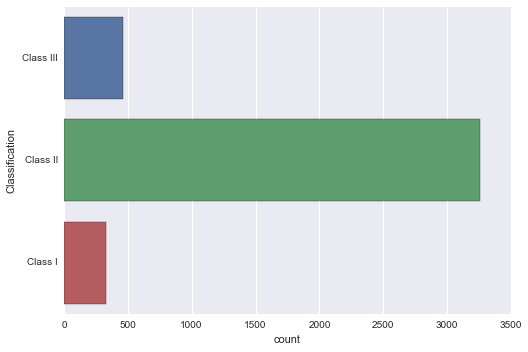

In [51]:
sns.countplot(y='Classification', data=ml_df)

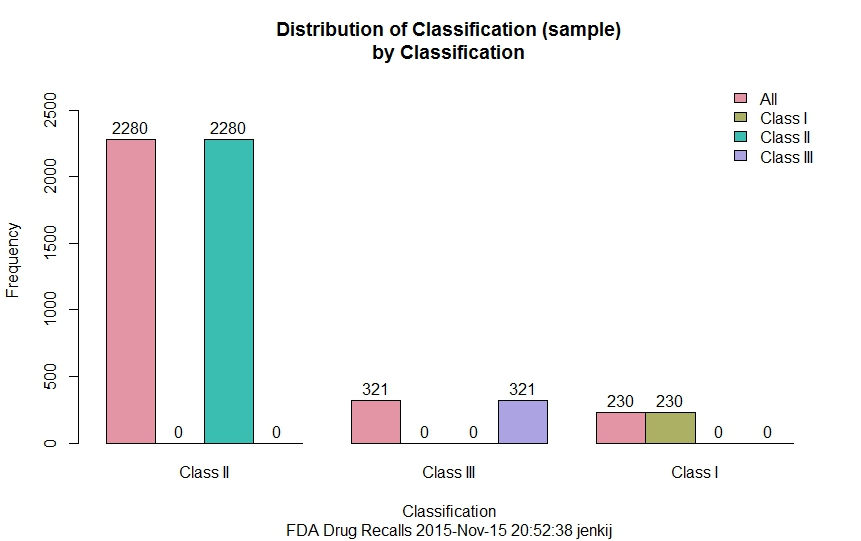

In [52]:
from IPython.display import Image
Image(filename='Distribution_of_Classifications.jpeg') 

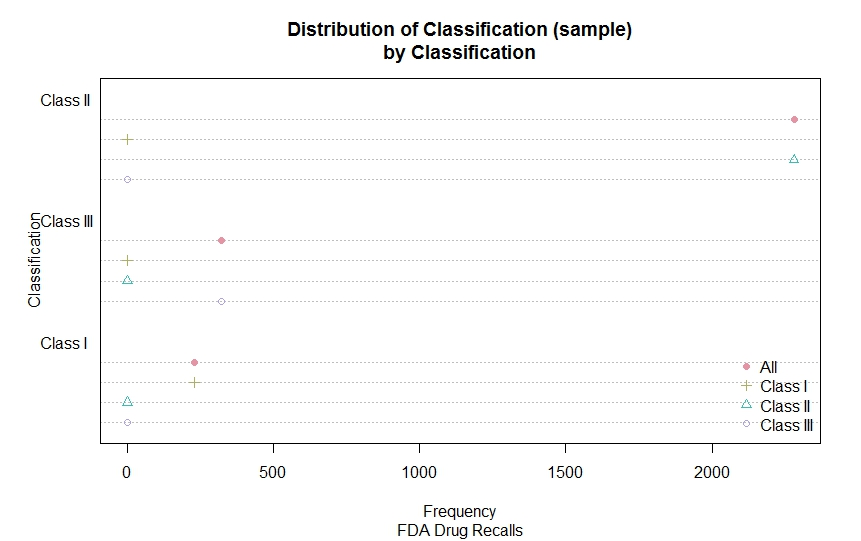

In [53]:
from IPython.display import Image
Image(filename='Dot_Distribution_of_Classification.jpeg') 

In [54]:
print list(ml_df.columns)

['Report Date', 'Country _AE', 'Country _CA', 'Country _CH', 'Country _GY', 'Country _IN', 'Country _US', 'Voluntary/Mandated _Voluntary: Firm Initiated', 'Distribution Pattern_AK, NC, GA', 'Distribution Pattern_AZ', 'Distribution Pattern_AZ and KS', 'Distribution Pattern_AZ, CT, MO, MS, PA, FL, WA, NC, CA, TX, OK', 'Distribution Pattern_All lots were distributed throughout the US.', 'Distribution Pattern_Amazon US and Amazon UK', "Distribution Pattern_Approximately 30% of all finished products were sold to customers in interstate to include but may not be limited to NY, NJ & CT via UPS.  Products are promoted and sold directly to customers at Healthy Life Chemistry's retail store at 13A Lucon Drive in Deer Park, NY, on the company website (www.purityfirst.com), and are available at the health food store, Total Health, located at 120 Rte 110, Farmingdale, NY (www.totaldiscountvitamins.com).", 'Distribution Pattern_Atlanta, Georgia', 'Distribution Pattern_CA', 'Distribution Pattern_CA &

In [55]:
features =list(ml_df.columns)

In [56]:
features.remove('Report Date')
features.remove('Classification')

In [57]:
print features

['Country _AE', 'Country _CA', 'Country _CH', 'Country _GY', 'Country _IN', 'Country _US', 'Voluntary/Mandated _Voluntary: Firm Initiated', 'Distribution Pattern_AK, NC, GA', 'Distribution Pattern_AZ', 'Distribution Pattern_AZ and KS', 'Distribution Pattern_AZ, CT, MO, MS, PA, FL, WA, NC, CA, TX, OK', 'Distribution Pattern_All lots were distributed throughout the US.', 'Distribution Pattern_Amazon US and Amazon UK', "Distribution Pattern_Approximately 30% of all finished products were sold to customers in interstate to include but may not be limited to NY, NJ & CT via UPS.  Products are promoted and sold directly to customers at Healthy Life Chemistry's retail store at 13A Lucon Drive in Deer Park, NY, on the company website (www.purityfirst.com), and are available at the health food store, Total Health, located at 120 Rte 110, Farmingdale, NY (www.totaldiscountvitamins.com).", 'Distribution Pattern_Atlanta, Georgia', 'Distribution Pattern_CA', 'Distribution Pattern_CA & VA', 'Distribu

In [58]:
X = ml_df[features]
y = ml_df['Classification']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [60]:
X.corr()

Country _AE  Country _CA  \
Country _AE                                            1.000000    -0.011721   
Country _CA                                           -0.011721     1.000000   
Country _CH                                           -0.000495    -0.005858   
Country _GY                                           -0.001310    -0.015511   
Country _IN                                           -0.000857    -0.010150   
Country _US                                           -0.083018    -0.983043   
Voluntary/Mandated _Voluntary: Firm Initiated               NaN          NaN   
Distribution Pattern_AK, NC, GA                       -0.000495    -0.005858   
Distribution Pattern_AZ                               -0.001401    -0.016585   
Distribution Pattern_AZ and KS                        -0.000495    -0.005858   
Distribution Pattern_AZ, CT, MO, MS, PA, FL, WA...    -0.000495    -0.005858   
Distribution Pattern_All lots were distributed ...    -0.000700    -0.008286   
Distribution Pattern_Amazon US and Amazon UK          -0.000700    -0.008286   
Distribution Pattern_Approximately 30% of all f...    -0.000700    -0.008286   
Distribution Pattern_Atlanta, Georgia                 -0.000495    -0.005858   
Distribution Pattern_CA                               -0.001310    -0.015511   
Distribution Pattern_CA & VA                          -0.000495    -0.005858   
Distribution Pattern_CA OH, PA, RI,& TX               -0.000495    -0.005858   
Distribution Pattern_CA and NV                        -0.000700    -0.008286   
Distribution Pattern_CA, FL and UT                    -0.000857    -0.010150   
Distribution Pattern_CA, GA, NC, and MO               -0.000495    -0.005858   
Distribution Pattern_CA, IN                           -0.000700    -0.008286   
Distribution Pattern_CO & OH                          -0.000495    -0.005858   
Distribution Pattern_CO, GA, MI, and Puerto Rico      -0.002431    -0.028782   
Distribution Pattern_CT                               -0.000495    -0.005858   
Distribution Pattern_CT, FL, MD, MS, NY               -0.000495    -0.005858   
Distribution Pattern_California                       -0.000495    -0.005858   
Distribution Pattern_California and Colorado.         -0.000700    -0.008286   
Distribution Pattern_Canada                           -0.000495     0.042209   
Distribution Pattern_Costa Rica                       -0.000495    -0.005858   
...                                                         ...          ...   
Distribution Pattern_US. No international. NATI...    -0.000495    -0.005858   
Distribution Pattern_US:  IN & WI                     -0.000495    -0.005858   
Distribution Pattern_US: Nationwide                   -0.000857    -0.010150   
Distribution Pattern_US: Nationwide ()                -0.000495    -0.005858   
Distribution Pattern_US: Nationwide and  Puerto...    -0.000495    -0.005858   
Distribution Pattern_US: Nationwide and Taiwan        -0.000495    -0.005858   
Distribution Pattern_US: Nationwide including P...    -0.000495    -0.005858   
Distribution Pattern_US: New England                  -0.000495    -0.005858   
Distribution Pattern_US; Nationwide, including ...    -0.000495    -0.005858   
Distribution Pattern_USA and Puerto Rico              -0.000495    -0.005858   
Distribution Pattern_USA including FL, MN,  NY,...    -0.000495    -0.005858   
Distribution Pattern_United States                    -0.000700    -0.008286   
Distribution Pattern_United States Nationwide         -0.000495    -0.005858   
Distribution Pattern_United States including Pu...    -0.000495    -0.005858   
Distribution Pattern_United States including: A...    -0.003660    -0.043335   
Distribution Pattern_United States including: O...    -0.000495    -0.005858   
Distribution Pattern_United States including: T...    -0.000495    -0.005858   
Distribution Pattern_United States, Puerto Rico...    -0.000495    -0.005858   
Distribution Pattern_Utah                           

# Logistic Regression

In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
X = ml_df[features]
y = ml_df['Classification']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=14)

In [63]:
from sklearn.metrics import accuracy_score
lr_rgr = LogisticRegression(random_state= 1)
lr_rgr.fit(X_train, y_train)
y_pred_lr = lr_rgr.predict(X_test)

In [64]:
print(1.0*sum(y_pred_lr==y_test)/len(y_pred_lr))
print(accuracy_score(y_test, y_pred_lr))

0.829051383399
0.829051383399


In [65]:
print(metrics.accuracy_score(y_test,y_pred_lr))

0.829051383399


In [66]:
print(confusion_matrix(y_test,y_pred_lr))

[[  9  80   0]
 [  0 810   1]
 [  0  92  20]]


# Decision Tree

In [67]:
from sklearn.tree import DecisionTreeClassifier

In [68]:
X = ml_df[features]
y = ml_df['Classification']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=14)
clf = DecisionTreeClassifier(random_state=14, criterion='entropy', max_depth=2)
clf.fit(X_train[features].values, y_train)
y_pred_clf = clf.predict(X_test[features].values)

In [69]:
print(metrics.accuracy_score(y_test,y_pred_clf))

0.801383399209


In [70]:
print(confusion_matrix(y_test,y_pred_clf))

[[  0  89   0]
 [  0 811   0]
 [  0 112   0]]


# AdaBoost

In [71]:
from sklearn.ensemble import AdaBoostClassifier

In [72]:
X = ml_df[features]
y = ml_df['Classification']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=14)

In [73]:
tree = DecisionTreeClassifier(random_state=14, criterion='entropy', max_depth=2)

In [74]:
ada = AdaBoostClassifier(base_estimator=tree, n_estimators=500, learning_rate=0.1, random_state=14)

In [75]:
tree = tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)
tree_train =accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)

print('Decision tree train/test accuracies %.3f/%3f' % (tree_train, tree_test))

Decision tree train/test accuracies 0.806/0.801383


In [76]:
ada = ada.fit(X_train, y_train)
y_train_pred = ada.predict(X_train)
y_test_pred = ada.predict(X_test)
ada_train =accuracy_score(y_train, y_train_pred)
ada_test = accuracy_score(y_test, y_test_pred)

print('AdaBoost train/test accuracies %.3f/%3f' % (ada_train, ada_test))

AdaBoost train/test accuracies 0.865/0.844862


# Random Forest

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split

In [78]:
X = ml_df[features]
y = ml_df['Classification']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=14)

rgr = RandomForestClassifier(random_state= 14)
rgr.fit(X_train[features].values, y_train)
y_pred = rgr.predict(X_test[features].values)

In [79]:
print(metrics.accuracy_score(y_test,y_pred))

0.836956521739


In [80]:
print(confusion_matrix(y_test,y_pred))

[[ 21  64   4]
 [  3 792  16]
 [  2  76  34]]


# Random Forest with GridSearch

In [81]:
X = ml_df[features]
y = ml_df['Classification']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=14)
parameter_space = {"max_features": [2, 100, 'auto'], "n_estimators": [100,], "criterion": ["gini", "entropy"],
                   "min_samples_leaf": [2, 4, 6]}

clf = RandomForestClassifier(random_state= 14)
grid = GridSearchCV(clf, parameter_space)
grid.fit(X_train.values, y_train)

print("Accuracy: {0: .1f}%".format(grid.best_score_ * 100))
#y_pred = rgr.predict(X_test[features].values)


Accuracy:  82.5%


In [82]:
print(grid.best_estimator_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features=100, max_leaf_nodes=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=14, verbose=0, warm_start=False)


In [83]:
y_pred = grid.predict(X_test.values)

In [84]:
scores = cross_validation.cross_val_score(rgr, X_test, y_pred, scoring='accuracy')
print("Accuracy: {0: .1f}%".format(np.mean(scores) * 100))

Accuracy:  98.5%


In [85]:
print(metrics.accuracy_score(y_test,y_pred))

0.829051383399


In [86]:
print(confusion_matrix(y_test,y_pred))

[[ 16  69   4]
 [  2 795  14]
 [  2  82  28]]


# SVM

In [87]:
from sklearn.cross_validation import KFold
from sklearn import svm
from sklearn.svm import SVC

In [88]:
X = ml_df[features]
y = ml_df['Classification']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=14)
parameter_space = {"max_features": [2, 100, 'auto'], "n_estimators": [100,], "criterion": ["gini", "entropy"],
                   "min_samples_leaf": [2, 4, 6]}

In [89]:
# fit the model
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [90]:
y_pred = clf.predict(X_test.values)

In [91]:
print(1.0*sum(y_pred == y_test)/len(y_test))
print(accuracy_score(y_test, y_pred))

0.839920948617
0.839920948617


In [92]:
print(metrics.accuracy_score(y_test,y_pred))

0.839920948617


In [93]:
print(confusion_matrix(y_test,y_pred))

[[ 21  64   4]
 [  3 794  14]
 [  1  76  35]]


# PCA

In [94]:
# PCA Logistic Regression

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [96]:
X = ml_df[features]
y = ml_df['Classification']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=14)

sc = StandardScaler()

X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

pca = PCA(n_components=2)
lr = LogisticRegression()

X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.fit_transform(X_test_std)

In [97]:
lr.fit(X_train_pca, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [98]:
y_pred_pca = lr.predict(X_test_pca)

In [99]:
print(pca.explained_variance_)

[ 3.09618982  2.00818185]


<Container object of 2 artists>

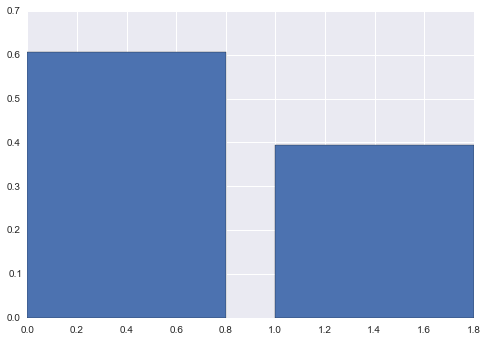

In [100]:
plt.figure()
total_variance = sum(pca.explained_variance_)
variance_explaned = [1.0*i/total_variance for i in pca.explained_variance_]

plt.bar(range(len(pca.explained_variance_)), variance_explaned)

In [101]:
print(pca.explained_variance_ratio_)

[ 0.02180415  0.01414213]


In [102]:
print(1.0*sum(y_pred_pca == y_test)/len(y_test))
print(accuracy_score(y_test, y_pred_pca))

0.798418972332
0.798418972332


In [103]:
print(confusion_matrix(y_test,y_pred_pca))

[[  0  89   0]
 [  3 808   0]
 [  0 112   0]]


In [104]:
# PCA Decision Tree

In [105]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [106]:
X = ml_df[features]
y = ml_df['Classification']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=14)

sc = StandardScaler()

X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

pca = PCA(n_components=2)

clf = DecisionTreeClassifier(random_state=14, criterion='entropy', max_depth=2)

X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.fit_transform(X_test_std)

In [107]:
clf.fit(X_train_pca, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=14, splitter='best')

In [108]:
y_pred_pca = clf.predict(X_test_pca)

In [109]:
print(pca.explained_variance_)

[ 3.09618982  2.00818185]


<Container object of 2 artists>

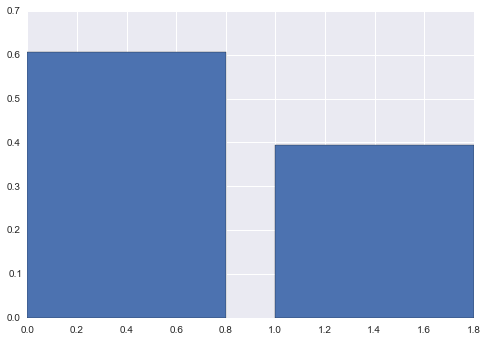

In [110]:
plt.figure()
total_variance = sum(pca.explained_variance_)
variance_explaned = [1.0*i/total_variance for i in pca.explained_variance_]

plt.bar(range(len(pca.explained_variance_)), variance_explaned)

In [111]:
print(pca.explained_variance_ratio_)

[ 0.02180415  0.01414213]


In [112]:
print(1.0*sum(y_pred_pca == y_test)/len(y_test))
print(accuracy_score(y_test, y_pred_pca))

0.801383399209
0.801383399209


In [113]:
print(confusion_matrix(y_test,y_pred_pca))

[[  0  89   0]
 [  0 811   0]
 [  0 112   0]]


In [114]:
# PCA AdaBoost

In [115]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [116]:
X = ml_df[features]
y = ml_df['Classification']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=14)

sc = StandardScaler()

X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

pca = PCA(n_components=2)

tree = DecisionTreeClassifier(random_state=14, criterion='entropy', max_depth=2)
ada = AdaBoostClassifier(base_estimator=tree, n_estimators=500, learning_rate=0.1, random_state=14)

X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.fit_transform(X_test_std)

tree = tree.fit(X_train_pca, y_train)
y_train_pred = tree.predict(X_train_pca)
y_test_pred = tree.predict(X_test_pca)
tree_train =accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)

print('Decision tree train/test accuracies %.3f/%3f' % (tree_train, tree_test))

Decision tree train/test accuracies 0.806/0.801383


In [117]:
ada = ada.fit(X_train_pca, y_train)
y_train_pred = ada.predict(X_train_pca)
y_test_pred = ada.predict(X_test_pca)
ada_train =accuracy_score(y_train, y_train_pred)
ada_test = accuracy_score(y_test, y_test_pred)

print('AdaBoost train/test accuracies %.3f/%3f' % (ada_train, ada_test))

AdaBoost train/test accuracies 0.813/0.800395


In [118]:
print(pca.explained_variance_)

[ 3.09618982  2.00818185]


<Container object of 2 artists>

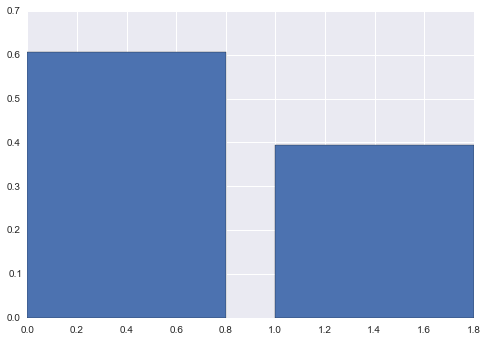

In [119]:
plt.figure()
total_variance = sum(pca.explained_variance_)
variance_explaned = [1.0*i/total_variance for i in pca.explained_variance_]

plt.bar(range(len(pca.explained_variance_)), variance_explaned)

In [120]:
# PCA Random Forest

In [121]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [122]:
X = ml_df[features]
y = ml_df['Classification']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=14)

sc = StandardScaler()

X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

pca = PCA(n_components=2)
rgr = RandomForestClassifier(random_state= 14)

X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.fit_transform(X_test_std)

In [123]:
rgr.fit(X_train_pca, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=14, verbose=0, warm_start=False)

In [124]:
y_pred = rgr.predict(X_test_pca)

In [125]:
print(1.0*sum(y_pred == y_test)/len(y_test))
print(accuracy_score(y_test, y_pred))

0.799407114625
0.799407114625


In [126]:
print(pca.explained_variance_)

[ 3.09618982  2.00818185]


<Container object of 2 artists>

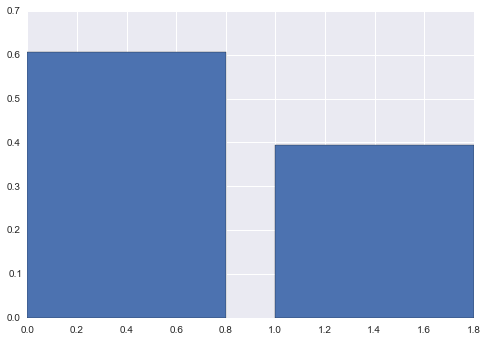

In [127]:
plt.figure()
total_variance = sum(pca.explained_variance_)
variance_explaned = [1.0*i/total_variance for i in pca.explained_variance_]

plt.bar(range(len(pca.explained_variance_)), variance_explaned)

In [128]:
print(confusion_matrix(y_test,y_pred))

[[  0  89   0]
 [  0 806   5]
 [  0 109   3]]


In [129]:
# PCA SVM

In [130]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [131]:
X = ml_df[features]
y = ml_df['Classification']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=14)

sc = StandardScaler()

X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

pca = PCA(n_components=2)
clf = svm.SVC(kernel='linear')

X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.fit_transform(X_test_std)

In [132]:
clf.fit(X_train_pca, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [133]:
y_pred = clf.predict(X_test_pca)

In [134]:
print(1.0*sum(y_pred == y_test)/len(y_test))
print(accuracy_score(y_test, y_pred))

0.801383399209
0.801383399209


In [135]:
print(pca.explained_variance_)

[ 3.09618982  2.00818185]


<Container object of 2 artists>

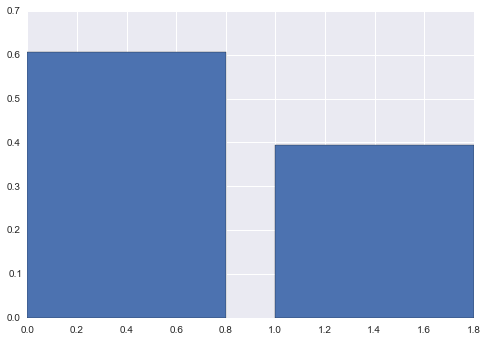

In [136]:
plt.figure()
total_variance = sum(pca.explained_variance_)
variance_explaned = [1.0*i/total_variance for i in pca.explained_variance_]

plt.bar(range(len(pca.explained_variance_)), variance_explaned)

In [137]:
print(confusion_matrix(y_test,y_pred))

[[  0  89   0]
 [  0 811   0]
 [  0 112   0]]


# Using the R in Python Interface Text Mining

In [138]:
#Importing the R in Python classes
from rpy2 import robjects
from rpy2.robjects import r # interface from Python to R
from rpy2.robjects.vectors import DataFrame
from rpy2.robjects.packages import importr, data
import rpy2.interactive.packages

In [139]:
# pandas requires numpy so I add the numpy R conversion as implicit
import rpy2.robjects.numpy2ri as numpy2ri
numpy2ri.activate()

In [140]:
# add pandas
from rpy2.robjects import pandas2ri
pandas2ri.activate()

In [141]:
r('install.packages("tm")')

rpy2.rinterface.NULL

In [142]:
r('library("tm")')

array(['tm', 'NLP', 'tools', 'stats', 'graphics', 'grDevices', 'utils',
       'datasets', 'methods', 'base'], 
      dtype='|S9')

In [143]:
r('data <- read.csv("tm_df.csv", stringsAsFactors = FALSE)')

X                                  Reason.for.Recall  \
1        0  Superpotent Drug: Out Of Specification (OOS) r...   
2        1  Superpotent Drug: Out Of Specification (OOS) r...   
3        2  Superpotent Drug: Out Of Specification (OOS) r...   
4        3  Superpotent Drug: Out Of Specification (OOS) r...   
5        4  Superpotent Drug: Out Of Specification (OOS) r...   
6        5  Superpotent Drug: Out Of Specification (OOS) r...   
7        6  Superpotent Drug: Out Of Specification (OOS) r...   
8        7  Superpotent Drug: Out Of Specification (OOS) r...   
9        8  Superpotent Drug: Out Of Specification (OOS) r...   
10       9  Superpotent Drug: Out Of Specification (OOS) r...   
11      10  Superpotent Drug: Out Of Specification (OOS) r...   
12      11  Superpotent Drug: Out Of Specification (OOS) r...   
13      12  Superpotent Drug: Out Of Specification (OOS) r...   
14      13  Superpotent Drug: Out Of Specification (OOS) r...   
15      14  Superpotent Drug: Out Of Specification (OOS) r...   
16      15  Superpotent Drug: Out Of Specification (OOS) r...   
17      16  Superpotent Drug: Out Of Specification (OOS) r...   
18      17  Superpotent Drug: Out Of Specification (OOS) r...   
19      18  Superpotent Drug: Out Of Specification (OOS) r...   
20      19  Superpotent Drug: Out Of Specification (OOS) r...   
21      20  Superpotent Drug: Out Of Specification (OOS) r...   
22      21  Lack of Assurance of Sterility; potential expo...   
23      22  Subpotent Drug: Stability samples were confirm...   
24      23                     Lack of assurance of sterility   
25      24                     Lack of assurance of sterility   
26      25                     Lack of assurance of sterility   
27      26                     Lack of assurance of sterility   
28      27                     Lack of assurance of sterility   
29      28                     Lack of assurance of sterility   
30      29                     Lack of assurance of sterility   
...    ...                                                ...   
4016  4399  Subpotent (Single Ingredient Drug): Low assay ...   
4017  4400  Subpotent (Single Ingredient Drug): Low assay ...   
4018  4401  Subpotent (Single Ingredient Drug): Low assay ...   
4019  4402  Subpotent (Single Ingredient Drug): Low assay ...   
4020  4403  Tablet Thickness: Product is being recalled du...   
4021  4404  Impurities/Degradation:  This recall is being ...   
4022  4405  Failed USP Dissolution Test Requirements: Out ...   
4023  4406  Impurities/Degradation Products; Product is be...   
4024  4407  Labeling: Label mix-up; Bottles labeled to con...   
4025  4408  Labeling: Label mix-up; Bottles labeled to con...   
4026  4409  Contraceptive Tablets Out of Sequence: This re...   
4027  4410  CGMP Deviations: There is potential that Abbot...   
4028  4411   CGMP Deviations: The pressure gages, vacuum g...   
4029  4412  Labeling: Presence of Undeclared Additive: Med...   
4030  4413  Superpotent (Single Ingredient) Drug: Above sp...   
4031  4414  Chemical Contamination: Complaints of an uncha...   
4032  4415  Presence of Particulate Matter:  In the course...   
4033  4416  Subpotent (Single Ingredient Drug): The firm i...   
4034  4417  Adulterated Presence of Foreign Tablets: Custo...   
4035  4418  Short Fill: These products are being recalled ...   
4036  4419  Short Fill: These products are being recalled ...   
4037  4420  Miscalibrated and/or Defective Delivery System...   
4038  4421  Miscalibrated and/or Defective Delivery System...   
4039  4422  Miscalibrated and/or Defective Delivery System...   
4040  4423  Miscalibrated and/or Defective Delivery System...   
4041  4424  Impurities/Degradation Products: Out Of Specif...   
4042  4425  Lack of Assurance of Sterility: Bausch & Lomb,...   
4043  4426  Presence of Particulate Matter: A single visib...   
4044  4427  Impurities/Degradation Products: High Out of S...   
4045  4428  Tablet Separation: The manufactu

In [144]:
r('print(colnames(data))')

array(['X', 'Reason.for.Recall', 'Distribution.Pattern',
       'Product.Description', 'Code.Info'], 
      dtype='|S20')

In [145]:
r('rfr_text <- paste(data$Reason.for.Recall, collapse=" ")')

array([ "Superpotent Drug: Out Of Specification (OOS) result for Assay.  Superpotent Drug: Out Of Specification (OOS) result for Assay.  Superpotent Drug: Out Of Specification (OOS) result for Assay.  Superpotent Drug: Out Of Specification (OOS) result for Assay.  Superpotent Drug: Out Of Specification (OOS) result for Assay.  Superpotent Drug: Out Of Specification (OOS) result for Assay.  Superpotent Drug: Out Of Specification (OOS) result for Assay.  Superpotent Drug: Out Of Specification (OOS) result for Assay.  Superpotent Drug: Out Of Specification (OOS) result for Assay.  Superpotent Drug: Out Of Specification (OOS) result for Assay.  Superpotent Drug: Out Of Specification (OOS) result for Assay.  Superpotent Drug: Out Of Specification (OOS) result for Assay.  Superpotent Drug: Out Of Specification (OOS) result for Assay.  Superpotent Drug: Out Of Specification (OOS) result for Assay.  Superpotent Drug: Out Of Specification (OOS) result for Assay.  Superpotent Drug: Out Of Specif

In [146]:
r('rfr_source <- VectorSource(rfr_text)')
r('rfr_corpus <- Corpus(rfr_source)')

<ListVector - Python:0x0000000032E2F448 / R:0x000000005260F2F8>
[ListVector, ListVector, DataFrame]
<ListVector - Python:0x0000000032E2F448 / R:0x000000005260F2F8>
[ListVector, ListVector, DataFrame]
<ListVector - Python:0x0000000032E2F448 / R:0x000000005260F2F8>
[ListVector, ListVector, DataFrame]
<ListVector - Python:0x0000000032E2F448 / R:0x000000005260F2F8>
[ListVector, ListVector, DataFrame]

In [147]:
#Cleaning of Reason for Recall Text
r('rfr_corpus <- tm_map(rfr_corpus, content_transformer(tolower))')
r('rfr_corpus <- tm_map(rfr_corpus, removePunctuation)')
r('rfr_corpus <- tm_map(rfr_corpus, stripWhitespace)')
r('rfr_corpus <- tm_map(rfr_corpus, removeWords, stopwords("english"))')

<ListVector - Python:0x0000000032A50348 / R:0x0000000052606DF0>
[ListVector, ListVector, DataFrame]
<ListVector - Python:0x0000000032A50348 / R:0x0000000052606DF0>
[ListVector, ListVector, DataFrame]
<ListVector - Python:0x0000000032A50348 / R:0x0000000052606DF0>
[ListVector, ListVector, DataFrame]
<ListVector - Python:0x0000000032A50348 / R:0x0000000052606DF0>
[ListVector, ListVector, DataFrame]

In [148]:
# Making a document-term matrix
r('rfr_dtm <- DocumentTermMatrix(rfr_corpus)')
r('rfr_dtm2 <- as.matrix(rfr_dtm)')

array([[  1.,   5.,   2., ...,   2.,   5.,  12.]])

In [149]:
#Finding the most frequent terms
r('rfr_frequency <- colSums(rfr_dtm2)')
r('rfr_frequency <- sort(rfr_frequency, decreasing=TRUE)')

array([  2.27800000e+03,   1.75800000e+03,   1.67200000e+03, ...,
         1.00000000e+00,   1.00000000e+00,   1.00000000e+00])

In [150]:
r('install.packages("wordcloud")')
r('library("wordcloud")')

array(['wordcloud', 'RColorBrewer', 'tm', 'NLP', 'tools', 'stats',
       'graphics', 'grDevices', 'utils', 'datasets', 'methods', 'base'], 
      dtype='|S12')

In [151]:
r('rfr_words <- names(rfr_frequency)')
r('head(rfr_words)')
#r('wordcloud(rfr_words[1:100], rfr_frequency[1:100])')
#r('dev.copy(jpeg.filename="rfr_wordcloud.jpeg"))

array(['sterility', 'products', 'assurance', 'penicillin', 'lack',
       'contamination'], 
      dtype='|S13')

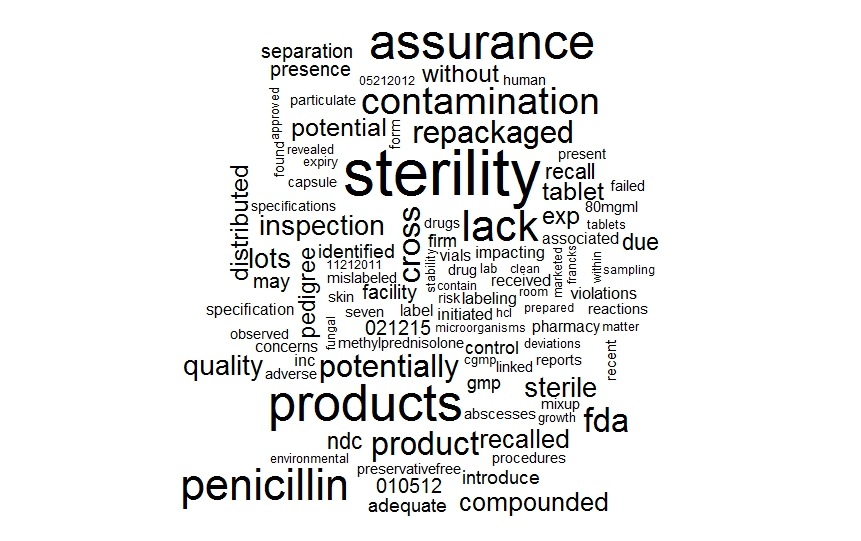

In [152]:
from IPython.display import Image
Image(filename='rfr_wordcloud.jpeg') 

In [153]:
#Text mining of Product Description
r('pd_text <- paste(data$Product.Description, collapse=" ")')

r('pd_source <- VectorSource(pd_text)')
r('pd_corpus <- Corpus(pd_source)')

#Cleaning of Product Description Text
r('pd_corpus <- tm_map(pd_corpus, content_transformer(tolower))')
r('pd_corpus <- tm_map(pd_corpus, removePunctuation)')
r('pd_corpus <- tm_map(pd_corpus, stripWhitespace)')
r('pd_corpus <- tm_map(pd_corpus, removeWords, stopwords("english"))')

# Making a document-term matrix
r('pd_dtm <- DocumentTermMatrix(pd_corpus)')
r('pd_dtm2 <- as.matrix(pd_dtm)')

#Finding the most frequent terms
r('pd_frequency <- colSums(pd_dtm2)')
r('pd_frequency <- sort(pd_frequency, decreasing=TRUE)')

r('install.packages("wordcloud")')
r('library("wordcloud")')

r('pd_words <- names(pd_frequency)')
r('head(pd_words)')
#r('wordcloud(pd_words[1:100], pd_frequency[1:100])')
#r('dev.copy(jpeg.filename="pd_wordcloud.jpeg"))

array(['ndc', 'street', 'pharmacy', 'injectable', 'inc', 'packaged'], 
      dtype='|S10')

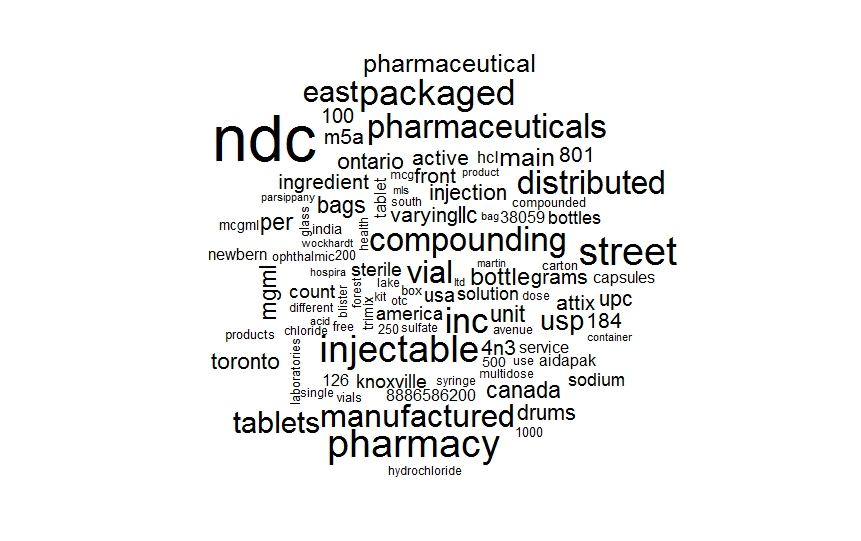

In [154]:
from IPython.display import Image
Image(filename='pd_wordcloud.jpeg') 

In [155]:
#Text mining of Distribution Pattern
r('dp_text <- paste(data$Distribution.Pattern, collapse=" ")')

r('dp_source <- VectorSource(dp_text)')
r('dp_corpus <- Corpus(dp_source)')

#Cleaning of Distribution Pattern Text
r('dp_corpus <- tm_map(dp_corpus, content_transformer(tolower))')
r('dp_corpus <- tm_map(dp_corpus, removePunctuation)')
r('dp_corpus <- tm_map(dp_corpus, stripWhitespace)')
r('dp_corpus <- tm_map(dp_corpus, removeWords, stopwords("english"))')

# Making a document-term matrix
r('dp_dtm <- DocumentTermMatrix(dp_corpus)')
r('dp_dtm2 <- as.matrix(dp_dtm)')

#Finding the most frequent terms
r('dp_frequency <- colSums(dp_dtm2)')
r('dp_frequency <- sort(dp_frequency, decreasing=TRUE)')

r('install.packages("wordcloud")')
r('library("wordcloud")')

r('dp_words <- names(dp_frequency)')
r('head(dp_words)')
#r('wordcloud(dp_words[1:100], dp_frequency[1:100])')
#r('dev.copy(jpeg.filename="dp_wordcloud.jpeg"))

array(['nationwide', 'rico', 'puerto', 'pharmacies', 'compounding',
       'organizations'], 
      dtype='|S13')

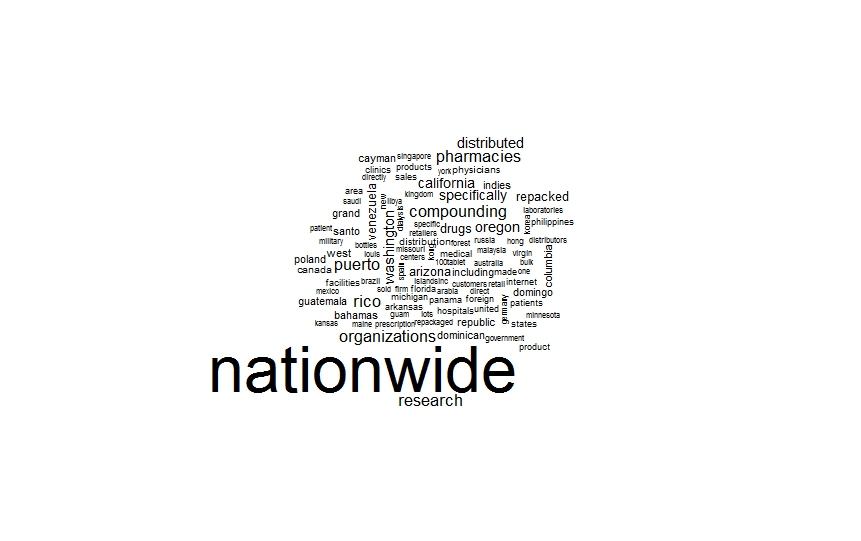

In [156]:
from IPython.display import Image
Image(filename='dp_wordcloud.jpeg') 